In [53]:
#!cp 6-expectation.py 10-kmeans.py
!chmod +x *.py

In [105]:
import scipy
import sklearn

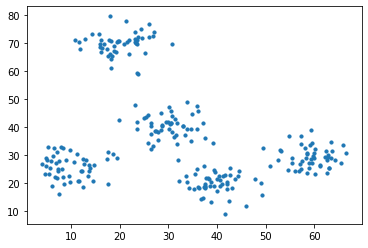

[[14.54730144 13.46780434]
 [20.57098466 33.55245039]
 [ 9.55556506 51.51143281]
 [48.72458008 20.03154959]
 [25.43826106 60.35542243]]


In [21]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
""" initialize cluster centroids for K-means """

import numpy as np


def initialize(X, k):
    """ doc """
    try:
        n, d = X.shape
        return np.random.uniform(np.amin(X, axis=0),
                                 np.amax(X, axis=0),
                                 size=(k, d))
    except Exception:
        return None

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.show()
    print(initialize(X, 5))

In [ ]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#kmeans = __import__('1-kmeans').kmeans

def kmeans(X, k, iterations=1000):
    """ doc """
    n, d = X.shape
    km = KMeans(n_clusters=k, n_init=1, max_iter=iterations).fit(X)
    return km.cluster_centers_, km.labels_

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    k = 7
    C, clss = kmeans(X, k)
    print(C)
    print(clss)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(k)))
    plt.show()

[[19.8719982  32.85851127]
 [49.55185774 24.76080087]
 [20.0835633  69.81592298]]
____________
(250,)
[0 0 2 0 1 0 0 1 2 1 1 0 2 1 2 0 0 1 1 2 0 0 2 1 0 0 1 1 0 1 1 0 2 0 1 0 1
 0 1 2 2 1 0 0 1 0 0 0 2 1 1 2 0 2 0 0 0 0 0 0 0 0 1 0 1 1 0 1 2 1 2 1 0 0
 0 0 2 0 0 2 1 0 1 2 0 1 0 0 1 2 0 0 1 0 0 2 0 2 1 1 0 0 1 1 1 0 0 1 1 1 0
 0 1 2 1 0 0 2 0 0 1 1 0 2 1 2 2 1 2 0 0 0 1 2 1 0 0 1 0 1 0 1 2 1 2 2 1 0
 0 2 1 0 1 1 2 2 2 1 1 1 0 0 0 1 1 1 1 0 2 2 2 2 0 1 1 2 0 1 1 0 1 1 0 2 0
 2 0 1 2 2 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 2 1 0 0 1 0 0 0 0 0 0 0 0 2 0 2 1
 1 0 2 1 1 1 1 2 2 1 1 1 1 1 1 0 0 1 1 1 0 2 1 0 0 1 0 1]


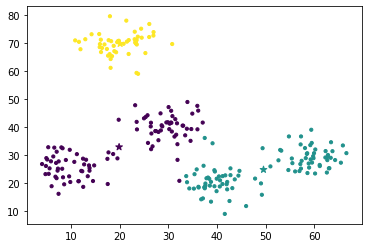

In [6]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
kmeans = __import__('1-kmeans').kmeans

def kmeallns(X, k, iterations=1000):
    """ doc """
    n, d = X.shape
    if type(iterations) is not int or iterations < 1:
        return None, None
    C = initialize(X, k)
    if C is None:
        return None, None
    clss = None
    for itr in range(iterations):
        prevC = C.copy()
        clss = np.apply_along_axis(np.subtract, 1, X, C)
        clss = np.argmin(np.square(clss).sum(axis=2), axis=1)
        for cent in range(k):
            Xs = np.argwhere(clss == cent)
            if Xs.shape[0] == 0:
                C[cent] = initialize(X, 1)
            else:
                C[cent] = np.mean(X[Xs], axis=0)
        if np.all(prevC == C):
            break;
    return C, clss

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    k = 3
    C, clss = kmeans(X, k)
    print(C)
    print("____________")
    print(clss.shape)
    print(clss)
    
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(k)))
    plt.show()

In [2]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [89]:
#!/usr/bin/env python3

import numpy as np
kmeans = __import__('1-kmeans').kmeans
#variance = __import__('2-variance').variance
def variance(X, C):
    """ doc """
    try:
        sub = np.apply_along_axis(np.subtract, 1, X, C)
        sub2 = np.apply_along_axis(np.subtract, 1, C, X.mean())
        #return ((sub)**2).sum(axis=len(X.shape)).min(axis=1).sum()
        return (np.linalg.norm(sub, axis=2)**2).min(axis=1).sum()
    except Exception:
        return None
if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    
    for k in range(1, 11):
        C, _ = kmeans(X, k)
        print('Variance with {} clusters: {}'.format(k, variance(X, C).round(5)))

Variance with 1 clusters: 157927.7052
Variance with 2 clusters: 82095.68297
Variance with 3 clusters: 34784.23723
Variance with 4 clusters: 23158.40095
Variance with 5 clusters: 7868.52123
Variance with 6 clusters: 7406.93077
Variance with 7 clusters: 6930.66361
Variance with 8 clusters: 6162.15884
Variance with 9 clusters: 5843.92455
Variance with 10 clusters: 5727.41124


[(array([[31.78625503, 37.01090945]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])), (array([[34.76990289, 28.71421162],
       [20.14417812, 69.38429903]]), array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

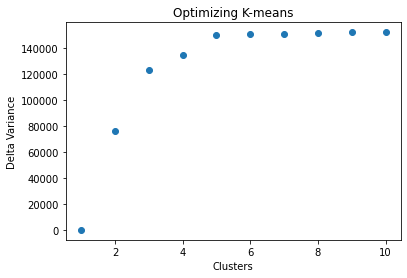

In [96]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
#optimum_k = __import__('3-optimum').optimum_k
def optimum_k(X, kmin=1, kmax=None, iterations=1000):
    """ doc """
    if type(X) is not np.ndarray:
        return None, None
    if kmax is None:
        kmax = X.shape[0]
    if ((X.ndim != 2 or type(kmin) is not int
         or kmin < 1 or type(iterations) is not int or iterations < 1
         or type(kmax) is not int or kmax <= kmin)):
        return None, None
    results = [kmeans(X, kmin, iterations)]
    firstvar = variance(X, results[0][0])
    d_vars = [0]
    while kmin < kmax:
        kmin += 1
        C, clss = kmeans(X, kmin, iterations)
        vari = variance(X, C)
        results.append((C, clss))
        d_vars.append(firstvar - vari)
        
    return results, d_vars

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    results, d_vars = optimum_k(X, kmax=10)
    print(results)
    print(np.round(d_vars, 5))
    plt.scatter(list(range(1, 11)), d_vars)
    plt.xlabel('Clusters')
    plt.ylabel('Delta Variance')
    plt.title('Optimizing K-means')
    plt.show()

In [99]:
def initialize(X, k):
    """ doc """
    if type(X) is not np.ndarray or X.ndim != 2\
       or type(k) is not int or k < 1:
        return None, None, None
    n, d = X.shape
    
    pi = np.full((k,), 1/k)
    m, _ = kmeans(X, k)
    S = np.full((k, d, d), np.identity(d))
    return pi, m, S

import numpy as np
#initialize = __import__('4-initialize').initialize

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    print(pi)
    print(m)
    print(S)

[0.25 0.25 0.25 0.25]
[[54.73711515 31.81393242]
 [16.84012557 31.20248225]
 [21.43215816 65.50449077]
 [32.3301925  41.80664127]]
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]


In [109]:
#!/usr/bin/env python3

import numpy as np
#pdf = __import__('5-pdf').pdf
#!/usr/bin/env python3
""" performs K-means on a dataset """

import numpy as np

kmeans = __import__('1-kmeans').kmeans


def pdf(X, m, S):
    """ doc """
    if type(X) is not np.ndarray or X.ndim != 2\
       or type(m) is not np.ndarray or m.ndim != 1\
       or type(S) is not np.ndarray or S.ndim != 2:
        return None
    try:
        n, d = X.shape
        det = np.linalg.det(S)
        if det == 0:
            return None
        X_m = (X - m).T
        Xmul = (X_m * np.matmul(np.linalg.inv(S), X_m)).sum(axis=0)
        exp = np.exp(Xmul / -2)
        sqrt = np.sqrt(np.power(2 * np.pi, d) * det)
        P = (exp / sqrt)
        P = np.maximum(P, 1e-300)
        return P
    except Exception:
        return None

if __name__ == '__main__':
    np.random.seed(0)
    m = np.array([12, 30, 10])
    S = np.array([[36, -30, 15], [-30, 100, -20], [15, -20, 25]])
    X = np.random.multivariate_normal(m, S, 10000)
    P = pdf(X, m, S)
    print(P)


[3.47450910e-05 2.53649178e-06 1.80348301e-04 ... 1.24604061e-04
 1.86345129e-04 2.59397003e-05]


In [52]:
#!/usr/bin/env python3

import numpy as np
initialize = __import__('4-initialize').initialize
#expectation = __import__('6-expectation').expectation
pdf = __import__('5-pdf').pdf
def expectation(X, pi, m, S):
    """ doc """
    if type(X) is not np.ndarray or X.ndim != 2\
       or type(pi) is not np.ndarray or pi.ndim != 1\
       or type(m) is not np.ndarray or m.ndim != 2\
       or type(S) is not np.ndarray or S.ndim != 3:
        return None, None
    try:
        n, d = X.shape
        k = pi.shape[0]
        k1, d1 = m.shape
        k2, d2, d3 = S.shape
        if (k != k1 or k != k2 or k1 != k2)\
           or (d != d1 or d != d2 or d != d3)\
           or (d1 != d2 or d1 != d3 or d2 != d3)\
           or np.any(np.linalg.det(S)) == 0 or not\
           np.isclose(pi.sum(), 1):
            return None, None
        pdfs = np.ndarray((k, n))
        for i in range(k):
            pdfs[i] = pdf(X, m[i], S[i])
        pdfs = pdfs * pi[:, np.newaxis]
        pdfsum = pdfs.sum(axis=0)
        g = pdfs / pdfsum
        l = np.log(pdfsum).sum()
        return g, l
    except Exception:
        raise
        return None, None

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    #m = np.append(m, np.array([[30], [3], [3], [3]]), 1)
    #print(m)
    g, l = expectation(X, pi, m, S)
    print(g)
    print(np.sum(g, axis=0))
    print(l)

[[1.98542668e-055 1.00000000e+000 1.56526421e-185 ... 1.00000000e+000
  3.70567311e-236 1.91892348e-012]
 [6.97883333e-085 2.28658376e-279 9.28518983e-065 ... 8.12227631e-287
  1.53690661e-032 3.17417182e-181]
 [9.79811365e-234 2.28658376e-279 2.35073465e-095 ... 1.65904890e-298
  9.62514613e-068 5.67072057e-183]
 [1.00000000e+000 7.21133039e-186 1.00000000e+000 ... 2.42138447e-125
  1.00000000e+000 1.00000000e+000]]
[1. 1. 1. ... 1. 1. 1.]
-652797.7866541843


In [ ]:
#!/usr/bin/env python3

import numpy as np
initialize = __import__('4-initialize').initialize
expectation = __import__('6-expectation').expectation
#maximization = __import__('7-maximization').maximization
def maximization(X, g):
    """ doc """
    

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    g, _ = expectation(X, pi, m, S)
    pi, m, S = maximization(X, g)
    print(pi)
    print(m)
    print(S)